In [74]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt  
%matplotlib inline

In [75]:
img = cv2.imread('E:/Self Made Projects/Sports Player Image Classification/test_image/images (24).jpg')
img.shape

(225, 225, 3)

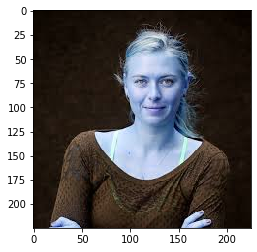

In [76]:
plt.imshow(img)

In [77]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [78]:
gray

array([[ 4,  4,  5, ...,  4,  4,  2],
       [ 4,  5,  5, ...,  4,  4,  2],
       [ 5,  5,  5, ...,  4,  4,  2],
       ...,
       [12, 13, 13, ...,  7,  7,  7],
       [12, 13, 13, ...,  6,  6,  6],
       [11, 10,  9, ...,  7,  7,  7]], dtype=uint8)

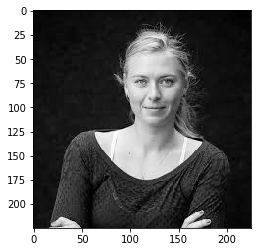

In [79]:
plt.imshow(gray ,cmap = 'gray')

In [80]:
face_cascade = cv2.CascadeClassifier('E:/Self Made Projects/Sports Player Image Classification/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:/Self Made Projects/Sports Player Image Classification/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[89, 46, 70, 70]], dtype=int32)

In [107]:
(x,y,w,h) = faces[0]
x,y,w,h

(89, 46, 70, 70)

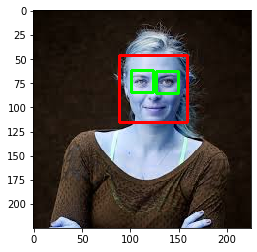

In [108]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

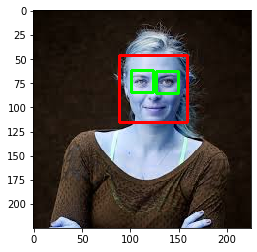

In [109]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

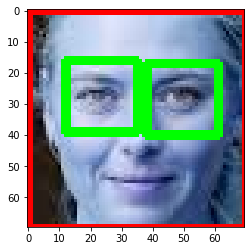

In [110]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [111]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

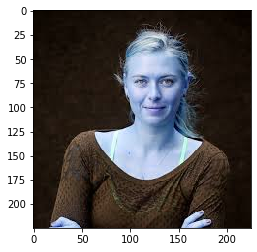

In [112]:
original_image = cv2.imread('E:/Self Made Projects/Sports Player Image Classification/test_image/images (24).jpg')
plt.imshow(original_image)

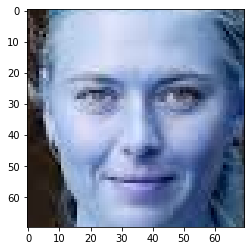

In [113]:
cropped_image = get_cropped_image_if_2_eyes('E:/Self Made Projects/Sports Player Image Classification/test_image/images (24).jpg')
plt.imshow(cropped_image)

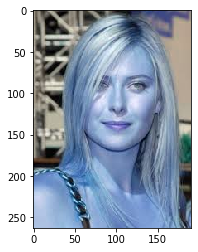

In [114]:
org_image_obstructed = cv2.imread('E:/Self Made Projects/Sports Player Image Classification/test_image/images (35).jpg')
plt.imshow(org_image_obstructed)

In [115]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('E:/Self Made Projects/Sports Player Image Classification/test_image/images (35).jpg')
cropped_image_no_2_eyes

In [100]:
path_to_data = "E:/Self Made Projects/Sports Player Image Classification/model/"
path_to_cr_data = "E:/Self Made Projects/Sports Player Image Classification/model/cropped/"


In [101]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [102]:
img_dirs

['E:/Self Made Projects/Sports Player Image Classification/model/lionel messi',
 'E:/Self Made Projects/Sports Player Image Classification/model/maria sharapova',
 'E:/Self Made Projects/Sports Player Image Classification/model/roger federer',
 'E:/Self Made Projects/Sports Player Image Classification/model/serena williams',
 'E:/Self Made Projects/Sports Player Image Classification/model/virat kohli']

In [103]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [104]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

lionel messi
Generating cropped images in folder:  E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi
maria sharapova
Generating cropped images in folder:  E:/Self Made Projects/Sports Player Image Classification/model/cropped/maria sharapova
roger federer
Generating cropped images in folder:  E:/Self Made Projects/Sports Player Image Classification/model/cropped/roger federer
serena williams
Generating cropped images in folder:  E:/Self Made Projects/Sports Player Image Classification/model/cropped/serena williams
virat kohli
Generating cropped images in folder:  E:/Self Made Projects/Sports Player Image Classification/model/cropped/virat kohli


### Wavelets Transform

In [105]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

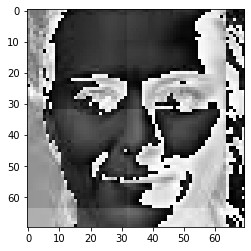

In [117]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [138]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel messi': ['E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi1.png',
  'E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi10.png',
  'E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi100.png',
  'E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi101.png',
  'E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi102.png',
  'E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi11.png',
  'E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi12.png',
  'E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi13.png',
  'E:/Self Made Projects/Sports Player Image Classification/model/cropped/lionel messi\\lionel messi14.png',
 

In [139]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel messi': 0,
 'maria sharapova': 1,
 'roger federer': 2,
 'serena williams': 3,
 'virat kohli': 4}

In [140]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
#         if img is None:
#             continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [141]:
len(X)

311

In [142]:
#size of an image
32*32*3 + 32*32*1

4096

In [143]:
#size of an image
len(X[0])

4096

In [144]:
len(y)

311

In [145]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(311, 4096)

In [146]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8717948717948718

In [178]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       1.00      0.81      0.90        16
           2       1.00      0.71      0.83         7
           3       0.76      0.94      0.84        17
           4       1.00      0.78      0.88        18

    accuracy                           0.87        78
   macro avg       0.91      0.85      0.87        78
weighted avg       0.90      0.87      0.87        78



In [179]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [185]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,15,20,50]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10,20,50]
        }
    }
}

In [182]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,model,best_score,best_params
0,svm,0.793991,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.639485,{'randomforestclassifier__n_estimators': 15}
2,logistic_regression,0.785408,{'logisticregression__C': 1}


In [183]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma='auto',
                      kernel='linear', max_iter=-1, probability=True,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False), 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None,
       

In [186]:
best_estimators['svm'].score(X_test,y_test)

0.8461538461538461

In [187]:
best_estimators['random_forest'].score(X_test,y_test)

0.7692307692307693

In [188]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8333333333333334

In [189]:
best_clf = best_estimators['svm']

In [190]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[18,  0,  2,  0,  0],
       [ 1, 13,  1,  1,  0],
       [ 1,  1,  5,  0,  0],
       [ 0,  1,  0, 16,  0],
       [ 2,  0,  0,  2, 14]], dtype=int64)

Text(69.0, 0.5, 'Truth')

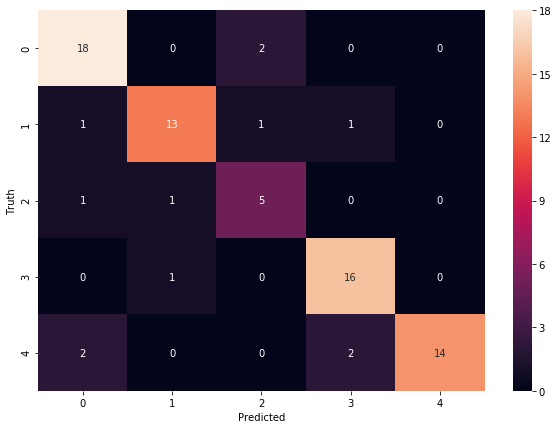

In [191]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [192]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [193]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))